In [96]:
import os
import pydicom
import dicom
import dicom_numpy
import math
from pydicom.data import get_testdata_files
import matplotlib.pyplot as plt

In [69]:
def obtenerImagenesDicom():
    files = os.listdir()
    dicom_files = []
    for file in files:
        if (file.find("dcm") >= 0):
            dicom_files.append(file)
    return dicom_files

In [68]:
def obtenerInformacionPaciente(filename):
    ds = pydicom.dcmread(fp=filename)
    print ("Datos del paciente")
    print("ID: %s" % ds.PatientID)
    print("Nombre: %s" % ds.PatientName)
    print("Edad: %s " % ds.PatientAge)
    print("Peso: %s [Kg]" % ds.PatientWeight)
    print("Fecha de nacimiento: %s" % ds.PatientBirthDate)
    print("Posición: %s" % ds.PatientPosition)

In [70]:
def extract_voxel_data(list_of_dicom_files):
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray

In [89]:
def inspeccionarImagen3D(): 
    for i in range (img_3d.shape[2]):
        plt.figure()
        plt.imshow(img_3d[:,:,i])
        plt.colorbar()
    

In [90]:
def inspeccionarImagenes():
    counter = 1
    for file in dicom_files:
        ds = pydicom.dcmread(file)
        image = ds.pixel_array
        plt.figure()
        plt.title("Image %s" %counter)
        plt.imshow(image)
        plt.colorbar()
        counter = counter + 1

In [91]:
dicom_files = obtenerImagenesDicom()
obtenerInformacionPaciente(dicom_files[0])           

Datos del paciente
ID: ProstateX-0000
Nombre: ProstateX-0000
Edad: 063Y 
Peso: 77 [Kg]
Fecha de nacimiento: 
Posición: FFS


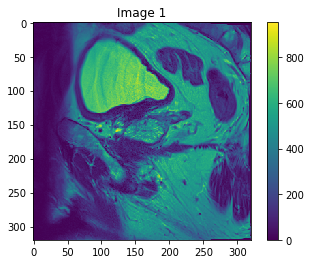

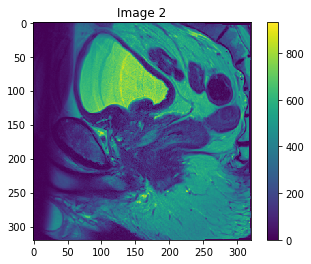

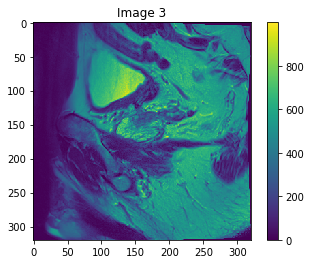

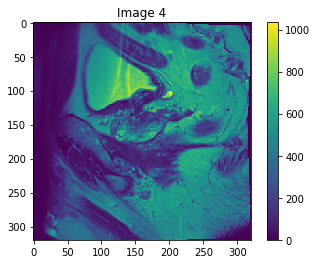

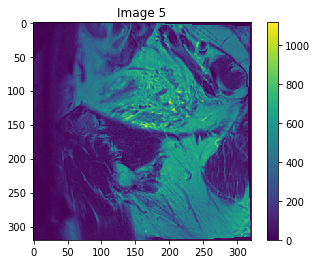

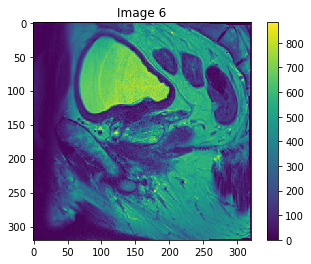

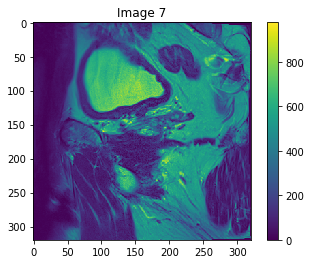

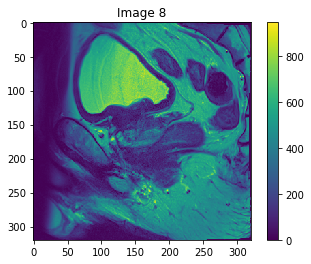

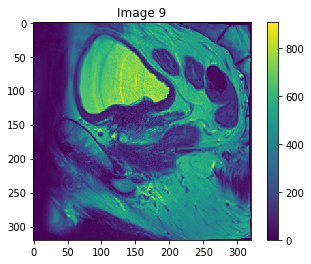

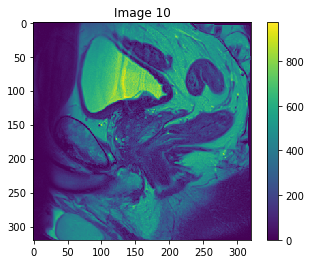

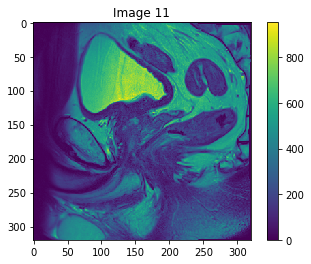

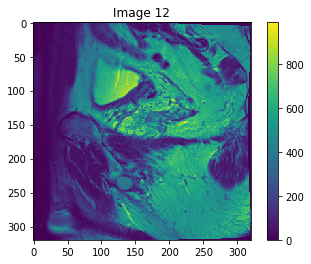

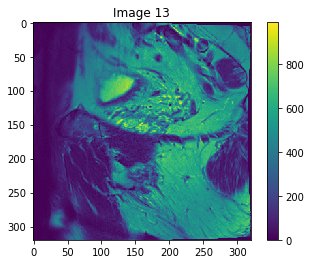

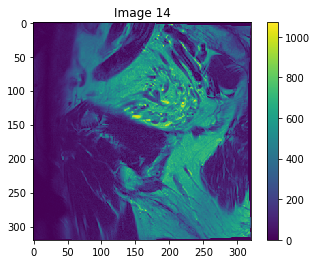

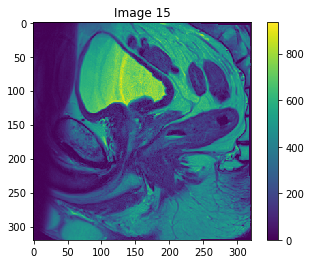

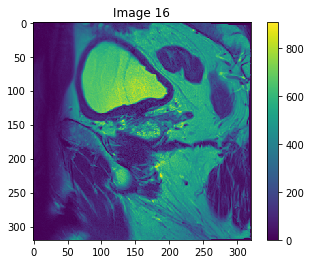

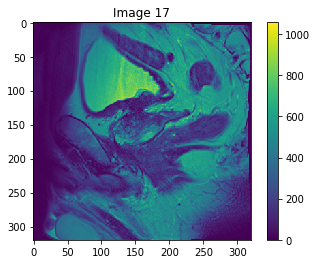

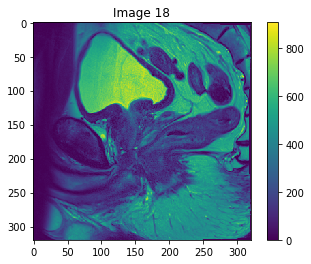

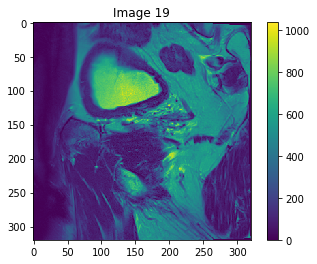

In [92]:
inspeccionarImagenes()


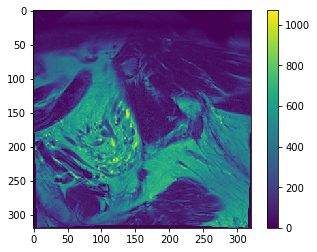

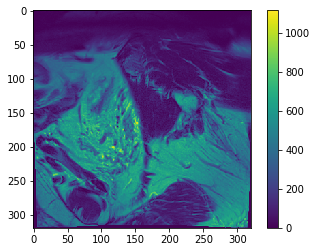

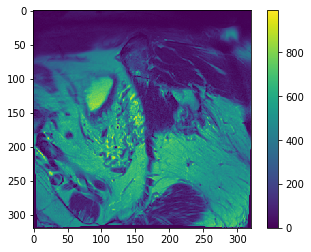

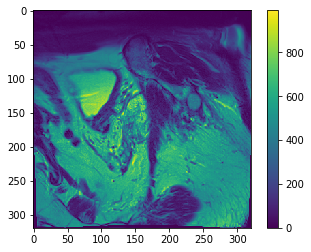

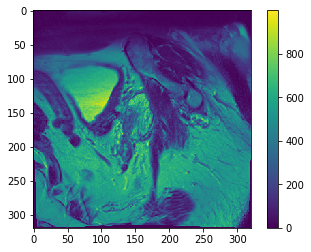

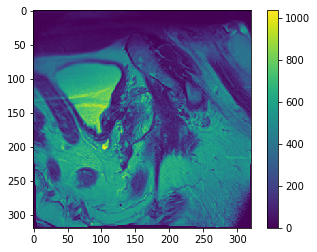

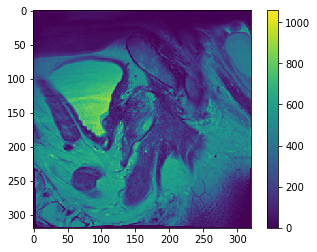

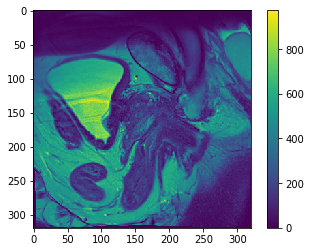

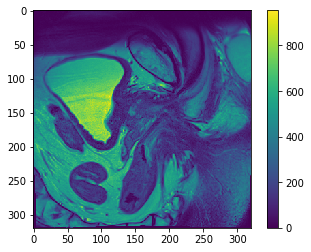

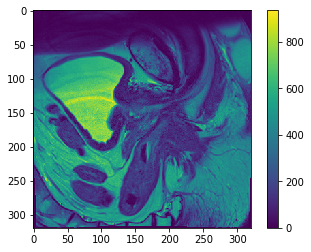

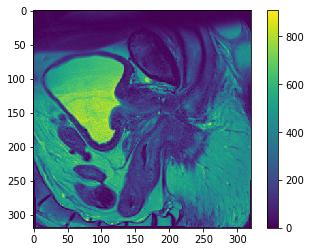

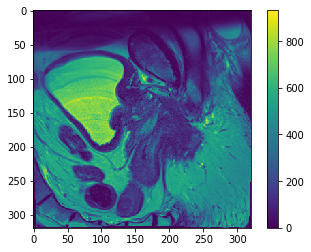

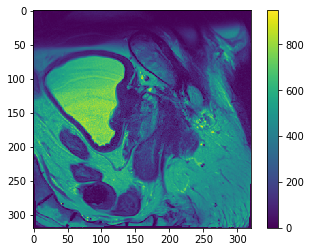

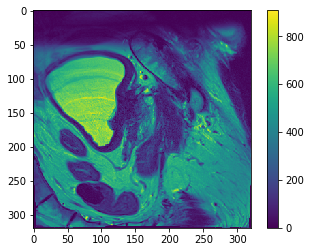

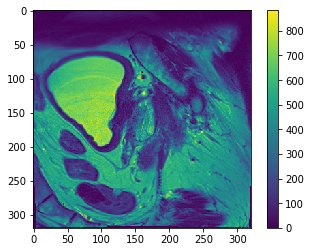

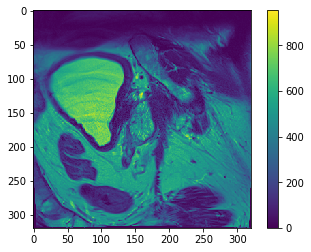

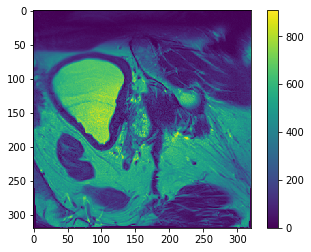

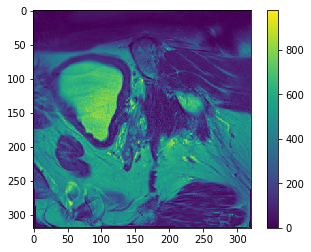

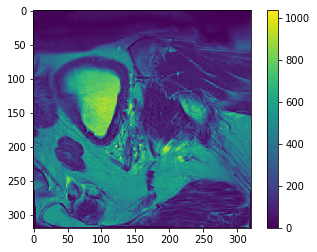

In [93]:
img_3d = extract_voxel_data(dicom_files)
inspeccionarImagen3D()

In [94]:
ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20110707'
(0008, 0013) Instance Creation Time              TM: '115243.109000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7311.5101.184176110177798789120636060173
(0008, 0020) Study Date                          DA: '20110707'
(0008, 0021) Series Date                         DA: '20110707'
(0008, 0022) Acquisition Date                    DA: '20110707'
(0008, 0023) Content Date                        DA: '20110707'
(0008, 0030) Study Time                          TM: '114731.187000'
(0008, 0031) Series Time                         TM: '115243.109000'
(0008, 0032) Acquisition Time                    TM: '114951.372500'
(0008, 0033) Content Time                        TM

In [95]:
plt.close('all')